In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./irius_threats_microservice.csv")

In [44]:
print(df.to_string())

                Component                           Use Case                            Source                                                                                                                    Threat                                              Risk response Inherent Risk Current Risk Countermeasure Progress Weakness Tests Countermeasure Tests Projected Risk          Owner
0             API gateway   Authentication and Authorization           Created by rules engine                                                                                                     Authentication Bypass  Planned Mitigation: 0%. Mitigated: 0%. Unmitigated: 100%.          High         High                      0%     Not tested           Not tested           High  Tomasz Skrond
1             API gateway             Logging and Monitoring           Created by rules engine                                                                       Exploitation of insufficient logging and monitori

In [45]:
relevant_data = df[["Component","Use Case","Threat","Inherent Risk"]]
component_risk = df[["Component","Inherent Risk"]]

print(df['Inherent Risk'])

# print(component_risk.to_string())
# print(type(relevant_data))

0          High
1          High
2      Critical
3          High
4          High
         ...   
123        High
124    Critical
125    Critical
126        High
127    Critical
Name: Inherent Risk, Length: 128, dtype: object


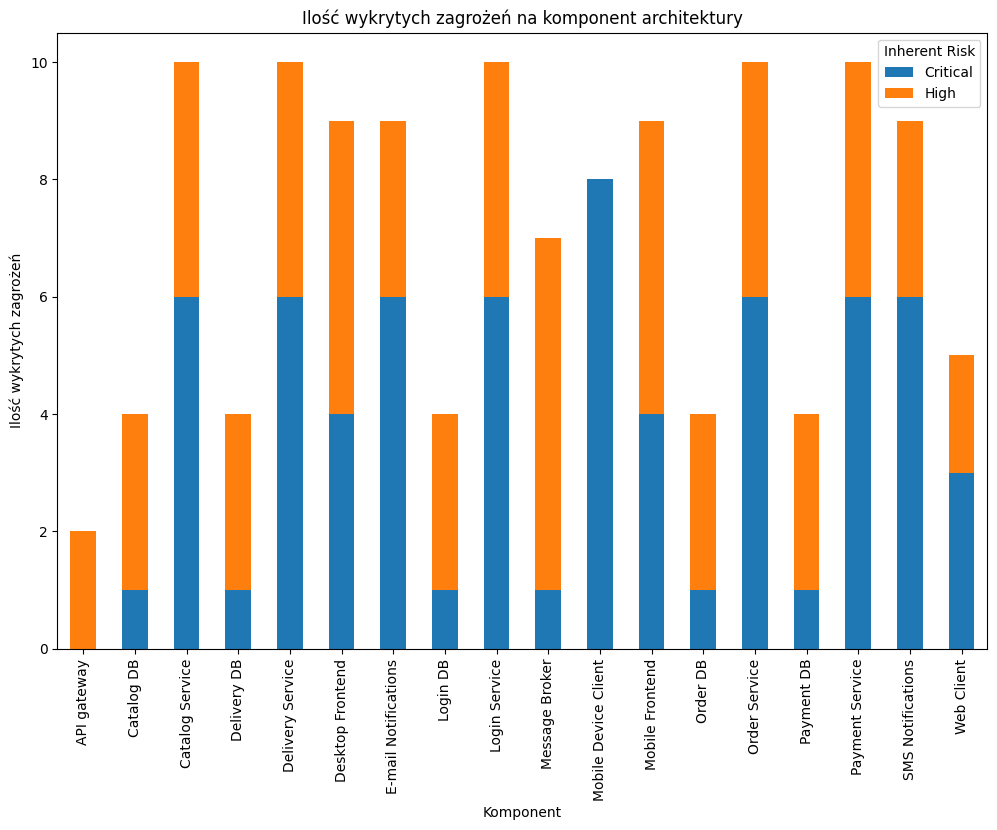

In [46]:
grouped_df = df.groupby(['Component', 'Inherent Risk']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ilość wykrytych zagrożeń na komponent architektury')
plt.xlabel('Komponent')
plt.ylabel('Ilość wykrytych zagrożeń')
plt.legend(title='Inherent Risk')
plt.show()

In [47]:
threats = df["Threat"]
threats_unique = df["Threat"].unique()

print(threats.tolist())
# print(threats_unique)

['Authentication Bypass', 'Exploitation of insufficient logging and monitoring', 'Attackers gain access to unauthorised data by exploiting vulnerabilities in the service', 'Authentication Bypass', 'Data leakage or disclosure to unauthorized parties', 'Attackers who compromise the application or application server could directly access and modify the data store', 'Sensitive data is exposed through weak security configurations', 'Attackers use known cloud vulnerabilities to access unauthorized data', 'Excessive Allocation', 'Attackers compromise images by modifying their content', 'Attackers gain access to the sensitive data through injecting code in the repositories', 'Availability is compromised through attacks against scalability configuration', 'Sensitive data is compromised by unauthorized access to container volumes', 'Exploitation of insufficient logging and monitoring', 'Sensitive data is compromised through network access', 'Attackers gain unauthorised access to data and/or syst

In [48]:
threats_shortened_by_gpt = [
    "Auth Bypass",
    "Insufficient Logging Exploit",
    "Unauthorized Data Access",
    "Auth Bypass",
    "Data Leakage",
    "App Data Manipulation",
    "Weak Security Config",
    "Cloud Vuln. Exploit",
    "Excessive Allocation",
    "Image Tampering",
    "Code Injection",
    "Scalability Attack",
    "Container Access",
    "Insufficient Logging Exploit",
    "Network Data Compromise",
    "SQL Injection",
    "Unauthorized Data Access",
    "Auth Bypass",
    "Data Leakage",
    "App Data Manipulation",
    "Weak Security Config",
    "Cloud Vuln. Exploit",
    "Excessive Allocation",
    "Image Tampering",
    "Code Injection",
    "Scalability Attack",
    "Container Access",
    "Insufficient Logging Exploit",
    "Network Data Compromise",
    "SQL Injection",
    "Script Injection",
    "Undiscovered Security Vulnerabilities",
    "Third-Party Compromise",
    "Client Secret Breach",
    "Deprecated Tech Exploit",
    "Script Injection",
    "MITM Attack",
    "Privilege Abuse",
    "Clickjacking",
    "Weak Security Config",
    "Cloud Vuln. Exploit",
    "Excessive Allocation",
    "Image Tampering",
    "Code Injection",
    "Scalability Attack",
    "Container Access",
    "Insufficient Logging Exploit",
    "Network Data Compromise",
    "Unauthorized Data Access",
    "Auth Bypass",
    "Data Leakage",
    "App Data Manipulation",
    "Weak Security Config",
    "Cloud Vuln. Exploit",
    "Excessive Allocation",
    "Image Tampering",
    "Code Injection",
    "Scalability Attack",
    "Container Access",
    "Insufficient Logging Exploit",
    "Network Data Compromise",
    "SQL Injection",
    "Push Notification Exploit",
    "MITM Attack",
    "SQL Injection",
    "Unauthorized Environment Control",
    "Account Config Weakness",
    "Denial of Service",
    "Data Deletion",
    "Fuzzing Attack",
    "Undiscovered Security Vulnerabilities",
    "Behavior Mod. Exploit",
    "Unnecessary Privilege Req.",
    "ACL Bypass",
    "WebView Exploit",
    "Error Handling Flaw",
    "Buffer Overflow Attack",
    "Script Injection",
    "Undiscovered Security Vulnerabilities",
    "Third-Party Compromise",
    "Client Secret Breach",
    "Script Injection",
    "MITM Attack",
    "Privilege Abuse",
    "Clickjacking",
    "Unauthorized Data Access",
    "Auth Bypass",
    "Data Leakage",
    "App Data Manipulation",
    "Weak Security Config",
    "Cloud Vuln. Exploit",
    "Excessive Allocation",
    "Image Tampering",
    "Code Injection",
    "Scalability Attack",
    "Container Access",
    "Insufficient Logging Exploit",
    "Network Data Compromise",
    "SQL Injection",
    "Unauthorized Data Access",
    "Auth Bypass",
    "Data Leakage",
    "App Data Manipulation",
    "Weak Security Config",
    "Cloud Vuln. Exploit",
    "Excessive Allocation",
    "Image Tampering",
    "Code Injection",
    "Scalability Attack",
    "Container Access",
    "Insufficient Logging Exploit",
    "Network Data Compromise",
    "SQL Injection",
    "Weak Security Config",
    "Cloud Vuln. Exploit",
    "Excessive Allocation",
    "Image Tampering",
    "Code Injection",
    "Scalability Attack",
    "Container Access",
    "Insufficient Logging Exploit",
    "Network Data Compromise",
    "Script Injection",
    "Undiscovered Security Vulnerabilities",
    "Client Secret Breach",
    "Deprecated Tech Exploit",
    "MITM Attack"
]

threat_mapping = dict(zip(df["Threat"].unique(), threats_shortened_by_gpt))
df['Threat'] = df['Threat'].map(threat_mapping)

print(df.to_string())

                Component                           Use Case                            Source                                 Threat                                              Risk response Inherent Risk Current Risk Countermeasure Progress Weakness Tests Countermeasure Tests Projected Risk          Owner
0             API gateway   Authentication and Authorization           Created by rules engine                            Auth Bypass  Planned Mitigation: 0%. Mitigated: 0%. Unmitigated: 100%.          High         High                      0%     Not tested           Not tested           High  Tomasz Skrond
1             API gateway             Logging and Monitoring           Created by rules engine           Insufficient Logging Exploit  Planned Mitigation: 0%. Mitigated: 0%. Unmitigated: 100%.          High         High                      0%     Not tested           Not tested           High  Tomasz Skrond
2              Catalog DB                     Access service          

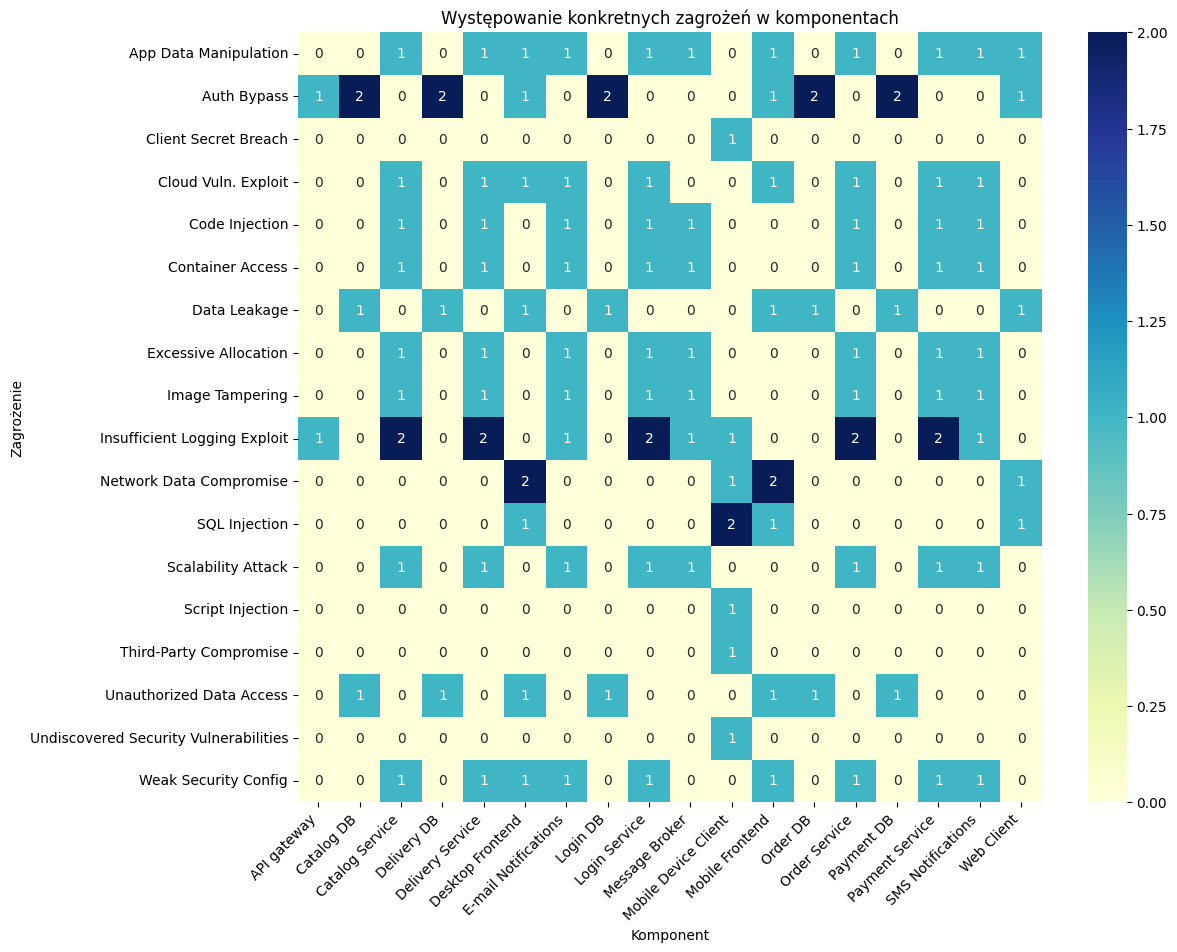

In [49]:

heatmap_data = df.groupby(['Threat', 'Component']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Występowanie konkretnych zagrożeń w komponentach')
plt.xlabel('Komponent')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()